In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data_output/RF_cat.csv')
tender = pd.read_csv('../Data_input/tender.csv')
parties = pd.read_csv('../Data_input/parties.csv')

## Features derivation

In [3]:
#data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.shape

(1373, 21)

In [5]:
data.head()

,procuringEntity_name,Sector,NF003,NF010,NF016,NF018,NF026,NF027,NF031,NF042,...,NF047,NF059,NF061,NF062,NF063,RF cases,Total cases,Total RF,Relacion contratos,Densidad RF
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1.000000,1.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,2,0,0,0,1,1,0,2,...,3,1,1,2,0,6,9,13,0.666667,2.166667
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0,0,0,0,0,0,0,24,...,49,0,0,0,0,57,109,73,0.522936,1.280702
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0,0,0,0,0,0,0,3,...,6,0,0,0,0,8,11,9,0.727273,1.125000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,2,0,0,0,1,0,0,1,...,2,0,0,2,0,2,2,8,1.000000,4.000000


## Creación y análisis de nuevos grupos de Red Flags

Salidas de cada Red Flag
#### - NF003
    - Datos de fechas, duraciones en días
#### - NF010
    - Cantidades de dinero, valores de bienes
#### - NF011
    - Dinero
#### - NF025
    - Ocurrencias de éxito de entidades
#### - NF026
    - Formación de grupos por Id de entidades participantes y ganadoras
#### - NF027
    - Regiones, mayores ofertas por ubicaciones
#### - NF031
    - Dinero, pagos, presupuesto
#### - NF042, NF044, NF047
    - Falta de información personal para las ofertas
#### - NF059
    - Dinero
#### - NF061, 62, 63
    - Tiempo, tiempo, tiempo

## Nuevas categorías unidas

In [6]:
dinero = ['NF010','NF031','NF059', 'NF016']
tiempo = ['NF003','NF061','NF062','NF063']
informacion = ['NF042','NF044','NF047']
frecuencias = ['NF018','NF026','NF027']

In [7]:
total_ocurr = data['RF cases']
money = data[dinero].sum(axis=1) / total_ocurr
time = data[tiempo].sum(axis=1) / total_ocurr
information = data[informacion].sum(axis=1) / total_ocurr
frequencies = data[frecuencias].sum(axis=1) / total_ocurr

In [8]:
data_reduce = pd.concat([data,money,time,information,frequencies], axis=1)
data_reduce

,procuringEntity_name,Sector,NF003,NF010,NF016,NF018,NF026,NF027,NF031,NF042,...,NF063,RF cases,Total cases,Total RF,Relacion contratos,Densidad RF,0,1,2,3
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,0,0,0,0,0,0,0,0,...,0,1,1,1,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,2,0,0,0,1,1,0,2,...,0,6,9,13,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0,0,0,0,0,0,0,24,...,0,57,109,73,0.522936,1.280702,0.000000,0.000000,1.280702,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0,0,0,0,0,0,0,3,...,0,8,11,9,0.727273,1.125000,0.000000,0.000000,1.125000,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,2,0,0,0,1,0,0,1,...,0,2,2,8,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,JUNTA PARROQUIAL DE CUYUJA,Gobierno Parroquial,0,0,0,0,0,0,0,0,...,0,1,1,1,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1369,JUNTA PARROQUIAL LA TOLA,Gobierno Parroquial,0,0,0,0,0,0,0,0,...,0,3,3,3,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1370,JUNTA PARROQUIAL BUENA VISTA,Gobierno Parroquial,0,0,0,0,0,0,0,1,...,0,3,3,4,1.000000,1.333333,0.000000,0.000000,1.333333,0.000000
1371,JUNTA PARROQUIAL SALANGO,Gobierno Parroquial,0,0,0,0,0,0,0,0,...,0,1,1,1,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [9]:
data_reduce = pd.concat([data_reduce.iloc[:,0:2],data_reduce.iloc[:,-6:]], axis=1)
data_reduce

,procuringEntity_name,Sector,Relacion contratos,Densidad RF,0,1,2,3
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0.522936,1.280702,0.000000,0.000000,1.280702,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0.727273,1.125000,0.000000,0.000000,1.125000,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000
...,...,...,...,...,...,...,...,...
1368,JUNTA PARROQUIAL DE CUYUJA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1369,JUNTA PARROQUIAL LA TOLA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1370,JUNTA PARROQUIAL BUENA VISTA,Gobierno Parroquial,1.000000,1.333333,0.000000,0.000000,1.333333,0.000000
1371,JUNTA PARROQUIAL SALANGO,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [10]:
data_reduce.columns = ['entidades',"sector","Relacion contratos","Densidad RF",'money','time','information','frequencies']

In [11]:
data_reduce

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0.522936,1.280702,0.000000,0.000000,1.280702,0.000000
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0.727273,1.125000,0.000000,0.000000,1.125000,0.000000
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000
...,...,...,...,...,...,...,...,...
1368,JUNTA PARROQUIAL DE CUYUJA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1369,JUNTA PARROQUIAL LA TOLA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1370,JUNTA PARROQUIAL BUENA VISTA,Gobierno Parroquial,1.000000,1.333333,0.000000,0.000000,1.333333,0.000000
1371,JUNTA PARROQUIAL SALANGO,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


## Método de codo

In [12]:
data_reduce.iloc[:,4:].corr()

,money,time,information,frequencies
money,1.000000,0.069328,-0.040043,0.016271
time,0.069328,1.000000,-0.049928,0.683660
information,-0.040043,-0.049928,1.000000,0.008291
frequencies,0.016271,0.683660,0.008291,1.000000


In [13]:
X = data_reduce.iloc[:,4:]

In [14]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [15]:
X_norm = sc.transform(X)

In [16]:
clusters = np.arange(2,11)

In [17]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

In [18]:
eva = pd.DataFrame({"K": clusters, "inercia": inercias})

In [19]:
eva

,K,inercia
0,2,3641.407808
1,3,2542.168426
2,4,1750.355279
3,5,1479.936504
4,6,1266.511179
5,7,1071.199746
6,8,894.628066
7,9,808.829078
8,10,723.441181


<AxesSubplot:xlabel='K', ylabel='inercia'>

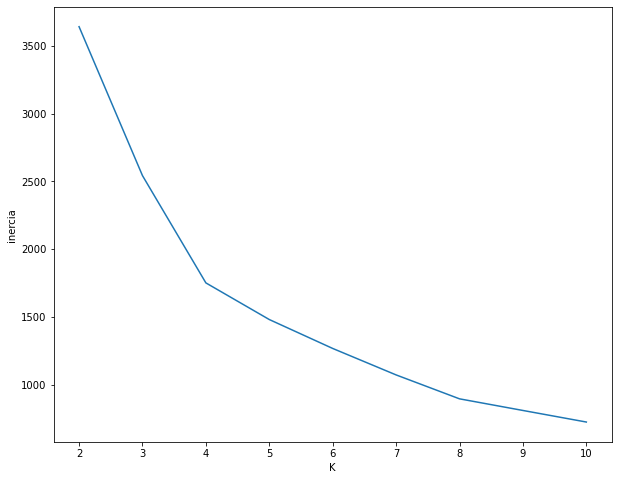

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

## Clustering

In [21]:
kmeans2 = KMeans(n_clusters=3, random_state=0)

In [22]:
kmeans2.fit(X_norm)

C:\Users\Jose\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [23]:
kmeans2.cluster_centers_

array([[-7.21415890e-02, -2.02939117e-01,  8.02278974e-03,
        -2.04739403e-01],
       [-1.62014251e-02,  3.29214550e+00, -1.06771724e-01,
         3.35791322e+00],
       [ 1.17637420e+01,  5.49411883e-01, -2.49641993e-01,
         1.97797600e-01]])

In [24]:
data_reduce2=data_reduce.copy()

In [25]:
data_reduce2['cluster'] = kmeans2.labels_

In [26]:
data_reduce2.head()

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333,1
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0.522936,1.280702,0.000000,0.000000,1.280702,0.000000,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0.727273,1.125000,0.000000,0.000000,1.125000,0.000000,0
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000,1


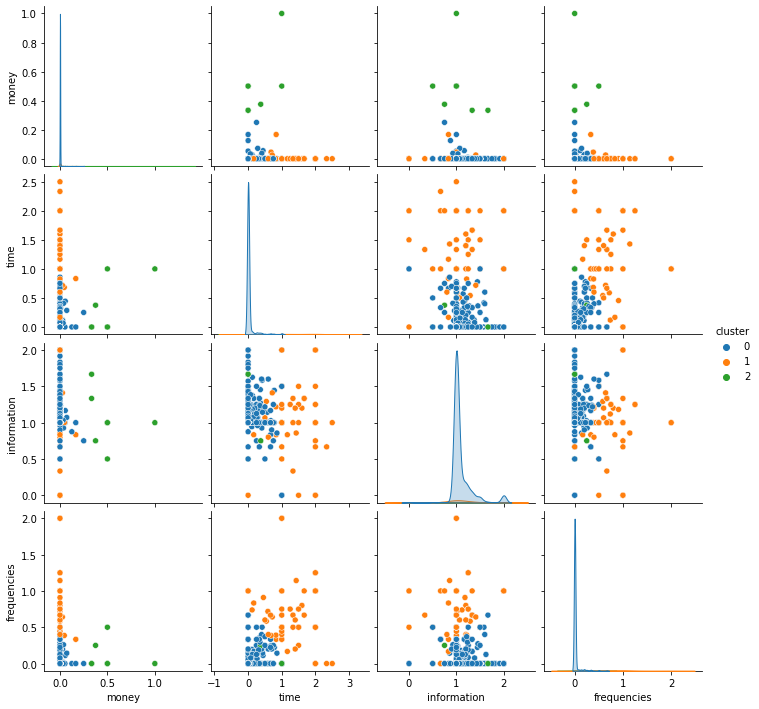

In [27]:
sns.pairplot(data_reduce2.iloc[:,4:],hue="cluster", palette="tab10")

<AxesSubplot:xlabel='cluster', ylabel='money'>

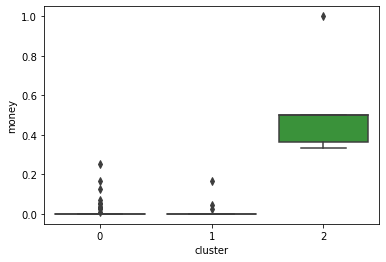

In [28]:
sns.boxplot(x='cluster', y='money', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='time'>

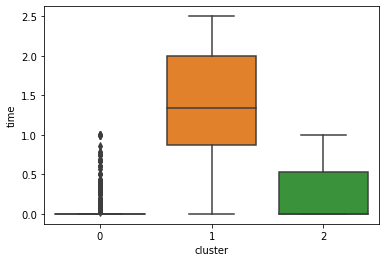

In [29]:
sns.boxplot(x='cluster', y='time', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='information'>

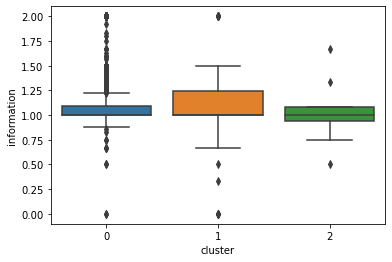

In [30]:
sns.boxplot(x='cluster', y='information', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

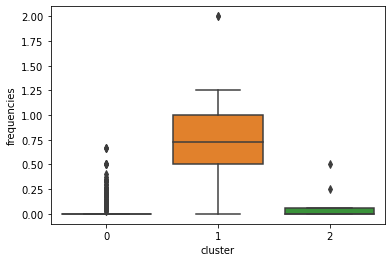

In [31]:
sns.boxplot(x='cluster', y='frequencies', data=data_reduce2)

<AxesSubplot:xlabel='cluster', ylabel='frequencies'>

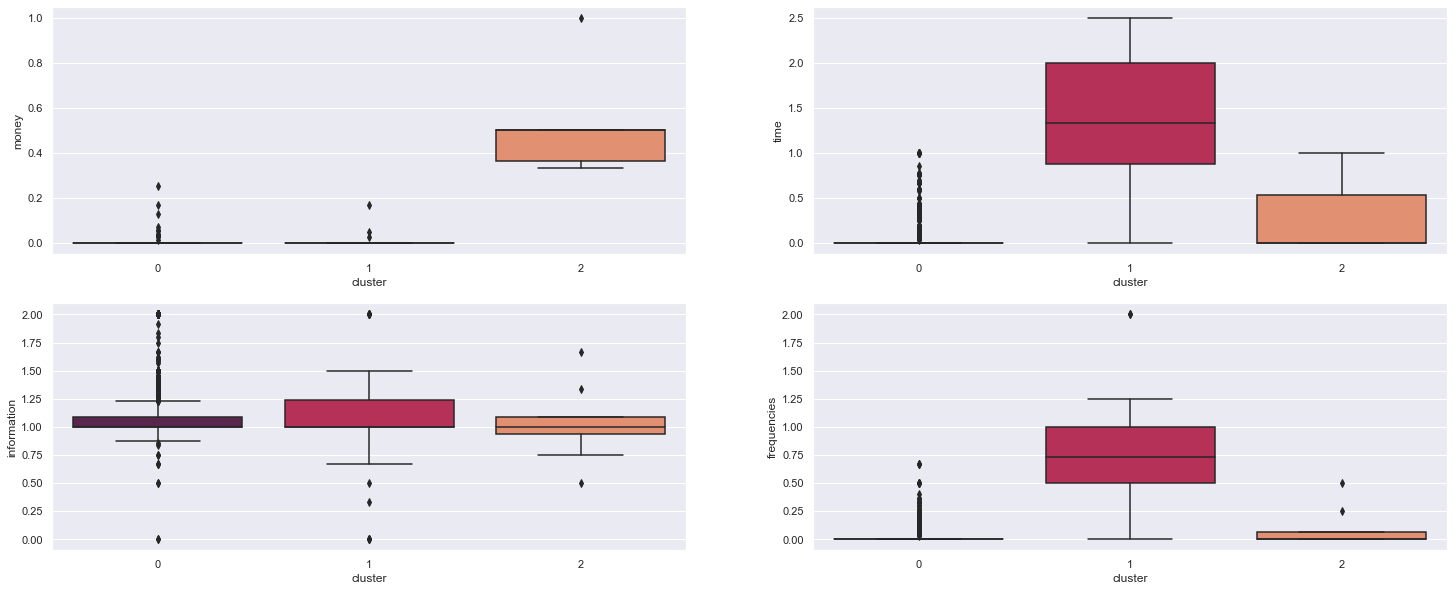

In [47]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(2,2,figsize =(25,10))
sns.boxplot(x="cluster",y="money", data = data_reduce2,ax=axs[0,0],palette="rocket")
sns.boxplot(x="cluster",y="time", data = data_reduce2,ax=axs[0,1],palette="rocket")
sns.boxplot(x="cluster",y="information", data = data_reduce2,ax=axs[1,0],palette="rocket")
sns.boxplot(x="cluster",y="frequencies", data = data_reduce2,ax=axs[1,1],palette="rocket")

In [33]:
#El cluster 1 es presenta mayor cantidad de redflags para los atributos de time, information y frequeuncies, sin embargo
#para money es el que tiene menos redflags.
#El cluster 0 esta colocado como el que menos redflags tiene para las variables de money y time, mientras que para las de
#information y frequencies se encuentra en la mitad.
#Por ultimo, el cluster 2 tiene el puesto con mayor redflags en money, para time esta segundo y para information y frequencies
#esta como ultimo.

In [34]:
data_reduce2

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333,1
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0.522936,1.280702,0.000000,0.000000,1.280702,0.000000,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0.727273,1.125000,0.000000,0.000000,1.125000,0.000000,0
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000,1
...,...,...,...,...,...,...,...,...,...
1368,JUNTA PARROQUIAL DE CUYUJA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0
1369,JUNTA PARROQUIAL LA TOLA,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0
1370,JUNTA PARROQUIAL BUENA VISTA,Gobierno Parroquial,1.000000,1.333333,0.000000,0.000000,1.333333,0.000000,0
1371,JUNTA PARROQUIAL SALANGO,Gobierno Parroquial,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0


In [35]:
data_reduce2['cluster'].value_counts()

0    1287
1      78
2       8
Name: cluster, dtype: int64

In [36]:
cluster_0=data_reduce2.loc[data_reduce2['cluster']==0]
cluster_0

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
0,ACCION SOCIAL COMO ENTIDAD DE INCLUSION SOCIAL...,GAD Parroquial,1.000000,1.000000,0.0,0.0,1.000000,0.0,0
2,AGENCIA DE REGULACIÓN Y CONTROL FITO Y ZOOSANI...,Agricultura y Ganaderia,0.522936,1.280702,0.0,0.0,1.280702,0.0,0
3,"AGENCIA NACIONAL DE REGULACION, CONTROL Y VIGI...",Seguridad,0.727273,1.125000,0.0,0.0,1.125000,0.0,0
5,AGRUPAMIENTO DE COMUNICACIONES Y GUERRA ELECTR...,Telecomunicaciones,0.866667,1.153846,0.0,0.0,1.153846,0.0,0
6,ARCONEL - AGENCIA DE REGULACIÓN Y CONTROL DE E...,Electrico,1.000000,1.000000,0.0,0.0,1.000000,0.0,0
...,...,...,...,...,...,...,...,...,...
1368,JUNTA PARROQUIAL DE CUYUJA,Gobierno Parroquial,1.000000,1.000000,0.0,0.0,1.000000,0.0,0
1369,JUNTA PARROQUIAL LA TOLA,Gobierno Parroquial,1.000000,1.000000,0.0,0.0,1.000000,0.0,0
1370,JUNTA PARROQUIAL BUENA VISTA,Gobierno Parroquial,1.000000,1.333333,0.0,0.0,1.333333,0.0,0
1371,JUNTA PARROQUIAL SALANGO,Gobierno Parroquial,1.000000,1.000000,0.0,0.0,1.000000,0.0,0


In [71]:
cluster_0.sort_values('information',ascending=False).reset_index(drop=True).head()

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
0,GOBIERNO AUTÓNOMO DESCENTRALIZADO MUNICIPAL DE...,GAD Municipal,1.0,2.0,0.0,0.0,2.0,0.0,0
1,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,GAD Parroquial,1.0,2.0,0.0,0.0,2.0,0.0,0
2,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL S...,GAD Parroquial,1.0,2.0,0.0,0.0,2.0,0.0,0
3,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,GAD Parroquial,1.0,2.0,0.0,0.0,2.0,0.0,0
4,DIRECCION DISTRITAL 05D02-LA MANA-EDUCACION,Educacion,1.0,2.0,0.0,0.0,2.0,0.0,0


In [37]:
cluster_0["sector"].value_counts()

GAD Parroquial             269
Salud                      214
GAD Municipal              115
Gobierno Parroquial        100
Educacion                   77
Bienestar Social            56
Gobierno Municipal          43
Defensa Nacional            43
Administrativo              43
Transporte                  39
Cuerpo de Bomberos          38
Hidráulico                  23
Jurisdiccional              20
Deporte                     19
Comercio                    16
Servicios                   15
Construccion                14
Electrico                   12
Seguridad                   12
Cultural                    12
GAD Provincial              12
Limpieza                    12
Municipalidad               11
Financiero                  11
Investigacion               10
Direccion Distrital          8
Gobierno Provincial          8
Agricultura y Ganaderia      7
Turismo                      5
Electoral                    3
Gobernacion                  3
Telecomunicaciones           3
Ambiente

In [54]:
cluster_0_agrupado=cluster_0.groupby("sector").agg({"entidades":lambda x: x.nunique(),"Relacion contratos":np.mean,
                                                   "Densidad RF":np.mean})
cluster_0_agrupado=cluster_0_agrupado.sort_values('entidades',ascending=False).reset_index()
cluster_0_agrupado

,sector,entidades,Relacion contratos,Densidad RF
0,GAD Parroquial,269,0.916724,1.069798
1,Salud,214,0.803872,1.132814
2,GAD Municipal,115,0.768832,1.141873
3,Gobierno Parroquial,97,0.911260,1.078029
4,Educacion,77,0.716870,1.180142
5,Bienestar Social,56,0.678010,1.097894
6,Administrativo,43,0.870070,1.075238
7,Gobierno Municipal,43,0.811071,1.212622
8,Defensa Nacional,43,0.625126,1.252883
9,Transporte,39,0.850282,1.167774


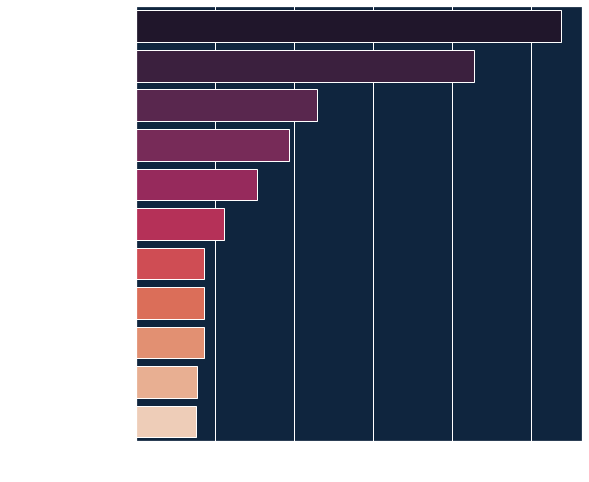

In [59]:
sns.set(rc={'axes.facecolor':'#0F253E','axes.labelcolor':'#FFFFFF','xtick.color':'#FFFFFF','ytick.color':'#FFFFFF' ,'figure.facecolor':(0,0,0,0)})
fig, ax = plt.subplots(figsize =(8,8))
_=sns.barplot(data = cluster_0_agrupado.iloc[:11,:], x="entidades", y="sector", palette="rocket" ,ax=ax)

In [39]:
cluster_1=data_reduce2.loc[data_reduce2['cluster']==1]
cluster_1

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
1,ACERIAS NACIONALES DEL ECUADOR SOCIEDAD ANONIM...,Comercio,0.666667,2.166667,0.166667,0.833333,0.833333,0.333333,1
4,AGENCIA NACIONAL DE REGULACIÓN Y CONTROL DEL T...,Transporte,1.000000,4.000000,0.000000,2.000000,1.500000,0.500000,1
7,ASAMBLEA NACIONAL,Legislativo,1.000000,3.000000,0.000000,1.000000,1.500000,0.500000,1
83,COMANDO CONJUNTO,Defensa Nacional,0.857143,1.976190,0.000000,0.119048,1.119048,0.738095,1
90,COMANDO PROVINCIAL DE POLICIA PASTAZA NO. 16,Defensa Nacional,1.000000,3.500000,0.000000,2.000000,1.000000,0.500000,1
...,...,...,...,...,...,...,...,...,...
1342,UNIVERSIDAD DE LAS FUERZAS ARMADAS ESPE,Educacion,0.454545,1.800000,0.000000,0.600000,0.800000,0.400000,1
1349,UNIVERSIDAD REGIONAL AMAZÓNICA IKIAM,Educacion,0.500000,2.000000,0.000000,0.000000,1.000000,1.000000,1
1363,COMANDO PROVINCIAL DE LA POLICIA DEL GUAYAS NR...,Seguridad,1.000000,1.833333,0.000000,0.166667,0.833333,0.833333,1
1364,COMANDO DE POLICIA DE ORELLANA,Seguridad,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1


In [40]:
cluster_1["sector"].value_counts()

Seguridad              12
Transporte             10
GAD Municipal           8
Defensa Nacional        6
Hidráulico              5
Comercio                4
Electrico               4
Educacion               3
Administrativo          3
Construccion            3
GAD Parroquial          2
Legislativo             2
Servicios               2
Deporte                 2
Electoral               2
Gobierno Municipal      2
Trabajo                 1
Gobierno Provincial     1
Jurisdiccional          1
Relacion Exterior       1
Turismo                 1
Salud                   1
Financiero              1
Bienestar Social        1
Name: sector, dtype: int64

In [73]:
cluster_1_agrupado=cluster_1.groupby("sector").agg({"entidades":lambda x: x.nunique(),"Relacion contratos":np.mean,
                                                   "Densidad RF":np.mean})
cluster_1_agrupado=cluster_1_agrupado.sort_values('entidades',ascending=False).reset_index()
cluster_1_agrupado

,sector,entidades,Relacion contratos,Densidad RF
0,Seguridad,12,1.000000,3.333333
1,Transporte,10,0.995833,2.790145
2,GAD Municipal,8,0.982843,3.316919
3,Defensa Nacional,6,0.976190,3.584127
4,Hidráulico,5,0.883333,2.236364
5,Comercio,4,0.916667,2.583333
6,Electrico,4,0.963117,2.187010
7,Administrativo,3,1.000000,2.777778
8,Construccion,3,0.991667,3.162393
9,Educacion,3,0.651515,2.600000


In [81]:
cluster_1.sort_values('time',ascending=False).reset_index(drop=True).head()

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
0,POLICIA NACIONAL SERVICIO RURAL LOS RIOS NO.8,Seguridad,1.000000,3.500000,0.0,2.500000,1.000000,0.0,1
1,COMANDO PROVINCIAL POLICÍA TUNGURAHUA NRO. 9,Seguridad,1.000000,3.000000,0.0,2.333333,0.666667,0.0,1
2,FEDERACION ECUATORIANA DE ATLETISMO,Deporte,0.333333,3.000000,0.0,2.000000,0.000000,1.0,1
3,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GAD Municipal,1.000000,3.500000,0.0,2.000000,1.000000,0.5,1
4,EOD DISTRITO METROPOLITANO DE QUITO,Administrativo,1.000000,3.666667,0.0,2.000000,0.666667,1.0,1


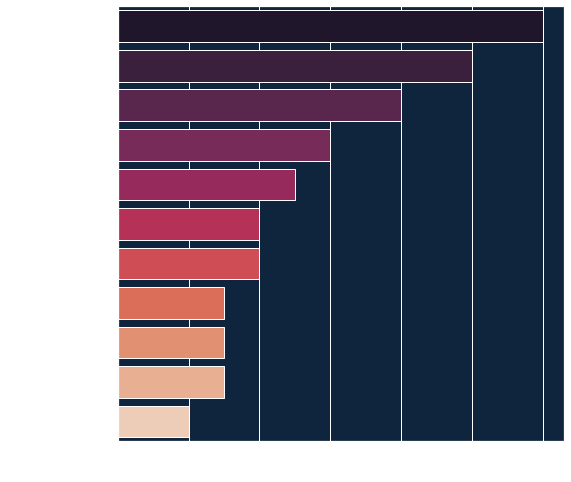

In [74]:
sns.set(rc={'axes.facecolor':'#0F253E','axes.labelcolor':'#FFFFFF','xtick.color':'#FFFFFF','ytick.color':'#FFFFFF' ,'figure.facecolor':(0,0,0,0)})
fig, ax = plt.subplots(figsize =(8,8))
_=sns.barplot(data = cluster_1_agrupado.iloc[:11,:], x="entidades", y="sector", palette="rocket" ,ax=ax)

In [42]:
cluster_2=data_reduce2.loc[data_reduce2['cluster']==2]
cluster_2

,entidades,sector,Relacion contratos,Densidad RF,money,time,information,frequencies,cluster
97,COMPAÑIA DE ECONOMIA MIXTA HOTELERA Y TURISTIC...,Turismo,1.000000,1.666667,0.333333,0.000,1.333333,0.00,2
156,CORPORACION DE PROMOCION ECONOMICA CONQUITO,Administrativo,0.666667,1.000000,0.500000,0.000,0.500000,0.00,2
444,EMPRESA PUBLICA FLOTA PETROLERA ECUATORIANA -E...,Servicios,1.000000,3.000000,0.500000,1.000,1.000000,0.50,2
1024,GOBIERNO PROVINCIAL DEL GUAYAS,Gobierno Parroquial,1.000000,1.750000,0.375000,0.375,0.750000,0.25,2
1132,JUNTA PARROQUIAL DE GARZA REAL,Gobierno Parroquial,1.000000,1.500000,0.500000,0.000,1.000000,0.00,2
1137,JUNTA PARROQUIAL DE CHIGUAZA,Gobierno Parroquial,1.000000,2.000000,0.333333,0.000,1.666667,0.00,2
1156,JUNTA PARROQUIAL DE TONCHIGÜE,Gobierno Parroquial,1.000000,1.500000,0.500000,0.000,1.000000,0.00,2
1241,MUNICIPIO DE BALAO,Gobierno Municipal,1.000000,3.000000,1.000000,1.000,1.000000,0.00,2


In [43]:
cluster_2["sector"].value_counts()

Gobierno Parroquial    4
Administrativo         1
Gobierno Municipal     1
Servicios              1
Turismo                1
Name: sector, dtype: int64

In [82]:
cluster_2_agrupado=cluster_2.groupby("sector").agg({"entidades":lambda x: x.nunique(),"Relacion contratos":np.mean,
                                                   "Densidad RF":np.mean})
cluster_2_agrupado=cluster_2_agrupado.sort_values('entidades',ascending=False).reset_index()
cluster_2_agrupado

,sector,entidades,Relacion contratos,Densidad RF
0,Gobierno Parroquial,4,1.000000,1.687500
1,Administrativo,1,0.666667,1.000000
2,Gobierno Municipal,1,1.000000,3.000000
3,Servicios,1,1.000000,3.000000
4,Turismo,1,1.000000,1.666667


In [88]:
cluster_2.sort_values('money',ascending=False).reset_index(drop=True).head()["entidades"][3]

'JUNTA PARROQUIAL DE  GARZA REAL'

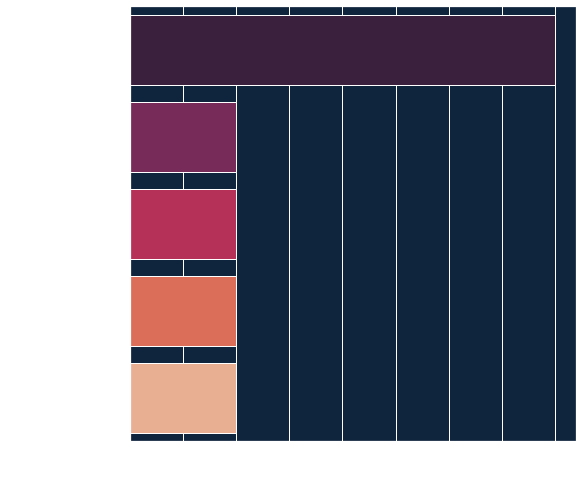

In [83]:
sns.set(rc={'axes.facecolor':'#0F253E','axes.labelcolor':'#FFFFFF','xtick.color':'#FFFFFF','ytick.color':'#FFFFFF' ,'figure.facecolor':(0,0,0,0)})
fig, ax = plt.subplots(figsize =(8,8))
_=sns.barplot(data = cluster_2_agrupado.iloc[:11,:], x="entidades", y="sector", palette="rocket" ,ax=ax)